<a href="https://colab.research.google.com/github/s1c5000/kaggle/blob/main/pima-indians-diabetes/5_%EC%B5%9C%EC%A0%81%EC%9D%98%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 로드와 split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sklearn/diabetes_feature.csv')
df.shape

(768, 16)

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [ ]:
x = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
       'Insulin_nan','low_glu_insulin']]
x.shape

(768, 9)

In [ ]:
y = df['Outcome']
y.shape

(768,)

sklearn에서 제공하는 model_selection의 train_test_split으로 테스트와 학습 나누어 보겠다

In [ ]:
# random 하게 세트들을 가져온다
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
X_train

,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,low_glu_insulin
60,84,0,0,0.0,0.304,21,False,102.5,True
618,112,82,24,28.2,1.282,50,True,169.5,False
346,139,46,19,28.7,0.654,22,False,83.0,False
294,161,50,0,21.9,0.254,65,False,102.5,False
231,134,80,37,46.2,0.238,46,False,370.0,False
...,...,...,...,...,...,...,...,...,...
71,139,64,35,28.6,0.411,26,False,140.0,False
106,96,122,0,22.4,0.207,27,False,102.5,True
270,101,86,37,45.6,1.136,38,True,169.5,False
435,141,0,0,42.4,0.205,29,False,169.5,False


In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((614, 9), (614,), (154, 9), (154,))

## 학습과 예측

In [ ]:
from sklearn import tree

model = tree.DecisionTreeClassifier(random_state=42)
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
y_predict = model.predict(X_test)

## 정확도 측정

In [ ]:
different_count = abs(y_predict - y_test).sum()
different_count

28

In [ ]:
(len(y_test)-different_count)/len(y_test) * 100

81.81818181818183

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_predict)

0.8181818181818182

그 전은 정확도를 90 가까이올렸는데 내려간 이유는 전의것이 오버피팅 됐을 수 있다

## 최적의 max_depth찾기

In [ ]:
feature_names =  X_train.columns.tolist()
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_nan',
 'low_glu_insulin']

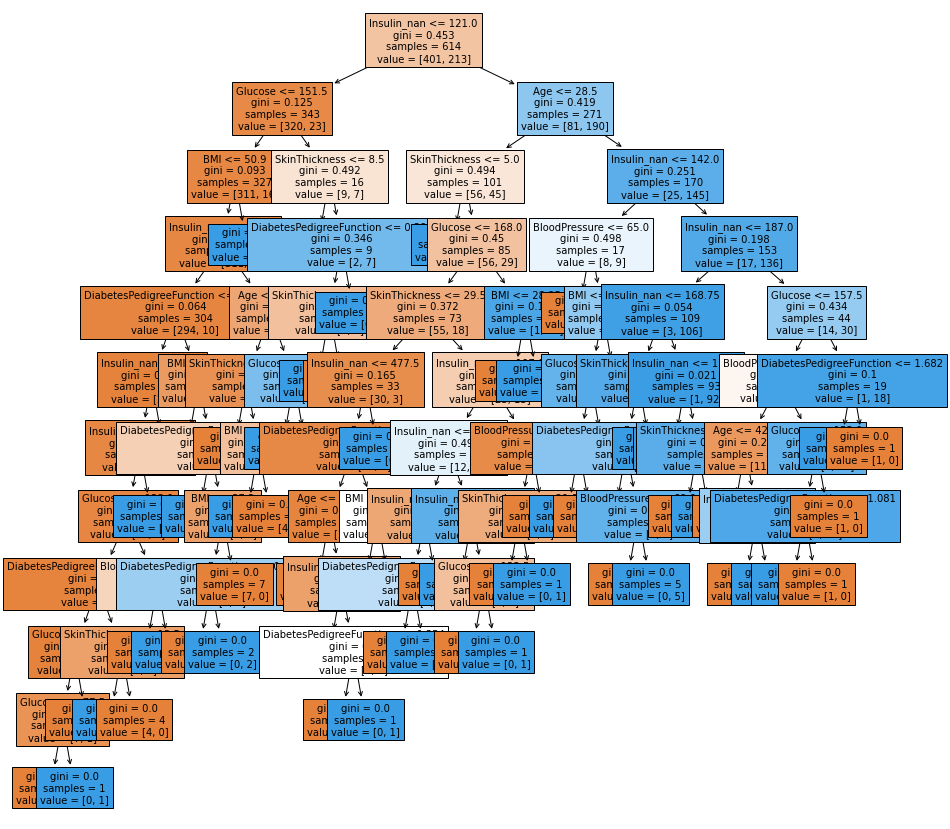

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,15))
tree_graph = plot_tree(model, fontsize = 10, feature_names=feature_names, filled=True)

위와 같이 그냥 파라미터 조정없이 트리를 학습시키면 overfitting되기 좋다       
tree의 파라미터를 조정하여 overfitting을 막아야 한다

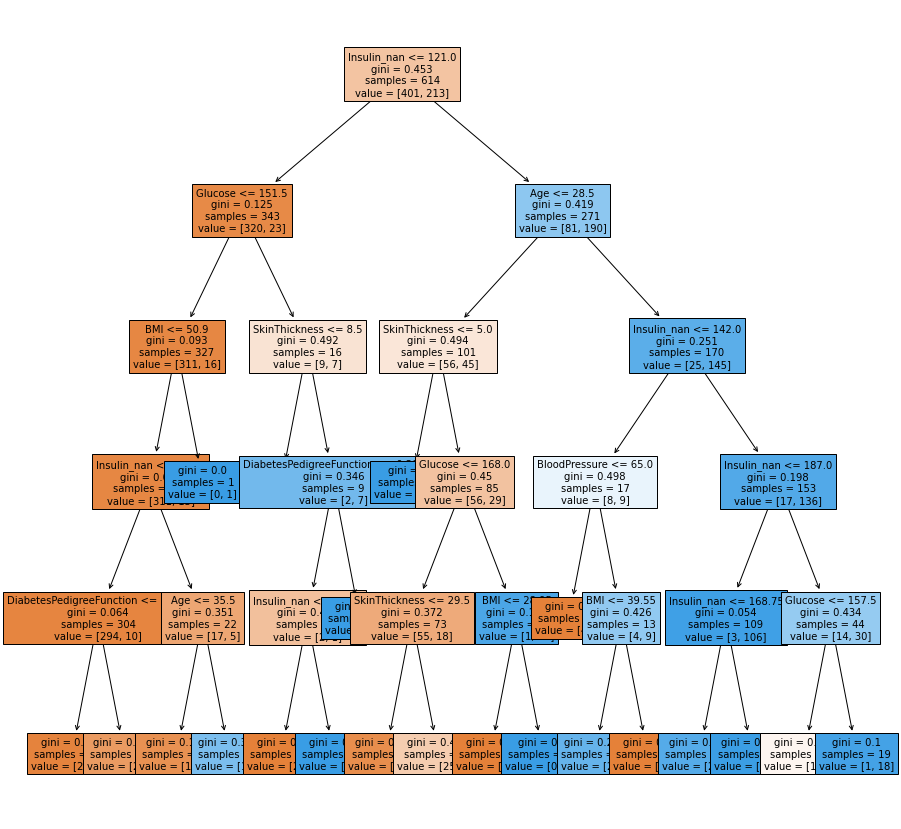

In [ ]:
# tree의 max_depth값을 조정해 보겠다
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=42, max_depth=5)
model.fit(X_train,y_train)

from sklearn.tree import plot_tree
plt.figure(figsize=(15,15))
tree_graph = plot_tree(model, feature_names=feature_names, filled=True, fontsize=10)

In [ ]:
from sklearn.metrics import accuracy_score

y_predict = model.predict(X_test)
print(abs(y_test - y_predict).sum())
accuracy_score(y_test, y_predict)

22


0.8571428571428571

너무 적거나 많으면 정확도가 좋지않다.    
max_depth를 바꿔가며 실험을 해봐야한다


In [ ]:
for max_depth in range(3, 12):
    model = tree.DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    y_predict = model.fit(X_train, y_train).predict(X_test)
    score = accuracy_score(y_test, y_predict) * 100
    print(max_depth, score)

3 85.06493506493507
4 87.66233766233766
5 85.71428571428571
6 81.81818181818183
7 81.81818181818183
8 81.81818181818183
9 83.76623376623377
10 79.22077922077922
11 81.81818181818183


max_dapth가 4일때가 정확도가 가장 높다    
하지만 다른 파라미터까지 이렇게 조정하며 최적의 파라미터를 찾기엔 무리가있다      
그래서 sklearn은 gridsearch를 제공한다     
gridsearch를 사용하면 최적의 파라미터를 쉽게 찾아준다

## gridsearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV 
model = tree.DecisionTreeClassifier(random_state=42)

# estimator : 사용할 모델,
# param_grid : 어떤 파라미터를 사용할지, 보통 dict형태로 파라미터들의 값을 정해서 준다.
#     max_features : 데이터의 하이퍼파라미터를 얼마나 사용할지. 0.3 이면 30프로 사용하겠다는 뜻
# n_jobs : 프로세서 얼마나 사용할지. -1이면 전부사용
# cv : cross_validation
# verbose : 1로 하면 로그를 찍는다

param_grid = {'max_depth': range(3,12), 'max_features': [0.3,0.5,0.7,0.9,1]}
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=1)
clf

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_

In [ ]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    2.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_

In [ ]:
# 학습시킨 후 가장 좋은 파라미터를 볼 수 있다
# 지정했던 값들 중에서 볼 수 있다.
# min_leef등은 지정하지 않아서 볼 수 없다.

clf.best_params_

{'max_depth': 5, 'max_features': 0.7}

In [ ]:
# 가장 좋은 파라미터를 알려준다
clf.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=0.7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
# 가장좋은 파라미터모델로 구한 정확도
clf.best_score_

0.8664934026389444

In [ ]:
# cross_validation 결과를 보여줌
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005264,0.001317,0.001679,0.000077,3,0.3,"{'max_depth': 3, 'max_features': 0.3}",0.747967,0.845528,0.764228,0.772358,0.852459,0.796508,0.043623,34
1,0.007248,0.003301,0.001662,0.000090,3,0.5,"{'max_depth': 3, 'max_features': 0.5}",0.780488,0.910569,0.813008,0.853659,0.918033,0.855151,0.053625,9
2,0.006692,0.002778,0.001691,0.000042,3,0.7,"{'max_depth': 3, 'max_features': 0.7}",0.780488,0.902439,0.804878,0.788618,0.844262,0.824137,0.044887,29
3,0.005041,0.001012,0.001614,0.000010,3,0.9,"{'max_depth': 3, 'max_features': 0.9}",0.788618,0.902439,0.804878,0.813008,0.819672,0.825723,0.039736,28
4,0.004705,0.002027,0.002637,0.002016,3,1,"{'max_depth': 3, 'max_features': 1}",0.691057,0.642276,0.699187,0.723577,0.647541,0.680728,0.031188,45
5,0.004035,0.000438,0.001652,0.000072,4,0.3,"{'max_depth': 4, 'max_features': 0.3}",0.821138,0.894309,0.756098,0.813008,0.836066,0.824124,0.044336,30
6,0.006290,0.002525,0.001563,0.000039,4,0.5,"{'max_depth': 4, 'max_features': 0.5}",0.788618,0.886179,0.804878,0.878049,0.918033,0.855151,0.049790,9
7,0.004884,0.000842,0.001587,0.000053,4,0.7,"{'max_depth': 4, 'max_features': 0.7}",0.813008,0.886179,0.829268,0.861789,0.918033,0.861655,0.037935,2
8,0.004656,0.000140,0.001602,0.000059,4,0.9,"{'max_depth': 4, 'max_features': 0.9}",0.821138,0.886179,0.853659,0.853659,0.893443,0.861615,0.026005,3
9,0.003591,0.000188,0.001521,0.000024,4,1,"{'max_depth': 4, 'max_features': 1}",0.723577,0.747967,0.715447,0.707317,0.704918,0.719845,0.015517,42


In [ ]:
# 가장 높은 순위로 정렬
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.004969,0.000705,0.001570,0.000033,5,0.7,"{'max_depth': 5, 'max_features': 0.7}",0.878049,0.910569,0.813008,0.837398,0.893443,0.866493,0.036082,1
7,0.004884,0.000842,0.001587,0.000053,4,0.7,"{'max_depth': 4, 'max_features': 0.7}",0.813008,0.886179,0.829268,0.861789,0.918033,0.861655,0.037935,2
8,0.004656,0.000140,0.001602,0.000059,4,0.9,"{'max_depth': 4, 'max_features': 0.9}",0.821138,0.886179,0.853659,0.853659,0.893443,0.861615,0.026005,3
18,0.005362,0.000625,0.001563,0.000018,6,0.9,"{'max_depth': 6, 'max_features': 0.9}",0.829268,0.894309,0.821138,0.878049,0.877049,0.859963,0.029149,4
27,0.006105,0.002487,0.002618,0.002197,8,0.7,"{'max_depth': 8, 'max_features': 0.7}",0.861789,0.878049,0.837398,0.853659,0.860656,0.858310,0.013162,5


가장 좋은파라미터를 구해봤으니 test데이터로 예측을 한뒤 정확도를 봐보자

In [ ]:
y_predict = clf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_predict)

0.8701298701298701

## randomsearchCV

gridsearch는 우리가 정해준 값 안에서만 가장좋은 파라미터를 찾는다     
randomsearch는 파라미터 값을 랜덤으로 정해서 가장 좋은 파라미터를 찾으려한다      
데이터에 대해 잘 모르거나 감을 잡을때 사용하면 좋다    
결과를 보면서 다시 파라미터값을 조정해주면서 맞춰간다.

In [ ]:
# 사용할 파라미터들을 랜덤값들로 정의한다.
max_depth = np.random.randint(3,20,10) # 3과 20 사이의 10개의 값
max_features = np.random.uniform(0.7, 1.0, 100) # 0.7 과 1.0사이의 100개의 값을 균일하게 뽑는다.

param_distributions = {'max_depth': max_depth,
                       'max_features': max_features,
                       'min_samples_split': list(range(2,7))
                       }
param_distributions

{'max_depth': array([11,  7, 18, 14, 17,  6, 11, 13,  5,  4]),
 'max_features': array([0.96305806, 0.7322262 , 0.89433058, 0.94430207, 0.80525056,
        0.82224246, 0.95207528, 0.95288565, 0.77027703, 0.98243115,
        0.95293163, 0.8804059 , 0.72025305, 0.83816853, 0.99004775,
        0.81346763, 0.71540699, 0.74250296, 0.94050005, 0.90094232,
        0.94851865, 0.96313733, 0.73617288, 0.83083397, 0.89786   ,
        0.73626649, 0.86898846, 0.71563008, 0.89275762, 0.75527428,
        0.86033336, 0.88028695, 0.92202375, 0.92054688, 0.98484096,
        0.7150583 , 0.99529673, 0.950392  , 0.82189568, 0.77800219,
        0.77793954, 0.81024995, 0.77651075, 0.75881824, 0.76624427,
        0.79458893, 0.92815505, 0.85002299, 0.91143836, 0.72318392,
        0.72063091, 0.96322245, 0.74510025, 0.82886587, 0.93554236,
        0.81428067, 0.7209266 , 0.89668991, 0.70009124, 0.84565465,
        0.90165455, 0.88020991, 0.93318242, 0.9702441 , 0.91497114,
        0.97241091, 0.75602652, 0.810

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# estimator : 사용할 모델,
# param_distributions : 파라미터값들을 랜덤하게 정해서 주게끔 미리 정의한다.
# n_iter : 얼마나 돌면서 파라미터 값을 찾을지
# n_jobs : 프로세서 얼마나 사용할지. -1이면 전부사용
# cv : cross_validation
# verbose : 1로 하면 로그를 찍는다


clf = RandomizedSearchCV(model,
    param_distributions,
    n_iter=1000,
    scoring="accuracy",
    n_jobs=-1,
    cv=5,
    random_state=42
    )

clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=42,
            

In [ ]:
# 가장 좋은 파라미터 조합
clf.best_params_

{'max_depth': 5, 'max_features': 0.7202530542002188, 'min_samples_split': 4}

In [ ]:
# 가장좋은 파라미터로 구한 최고점수
clf.best_score_

0.8697454351592697

In [ ]:
# 최적의 파라미터를 구했으니 test데이터 정확도를 보겠다
clf.score(X_test, y_test)

0.8701298701298701

In [ ]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
135,0.004435,0.000139,0.001539,0.000027,4,0.720253,5,"{'min_samples_split': 4, 'max_features': 0.720...",0.878049,0.910569,0.813008,0.853659,0.893443,0.869745,0.033985,1
520,0.004519,0.000078,0.001609,0.000032,4,0.736173,5,"{'min_samples_split': 4, 'max_features': 0.736...",0.878049,0.910569,0.813008,0.853659,0.893443,0.869745,0.033985,1
379,0.004396,0.000103,0.001521,0.000024,4,0.748874,5,"{'min_samples_split': 4, 'max_features': 0.748...",0.878049,0.910569,0.813008,0.853659,0.893443,0.869745,0.033985,1
415,0.005226,0.001162,0.001625,0.000034,4,0.776511,5,"{'min_samples_split': 4, 'max_features': 0.776...",0.878049,0.910569,0.813008,0.853659,0.893443,0.869745,0.033985,1
647,0.004466,0.000123,0.001582,0.000054,4,0.720631,5,"{'min_samples_split': 4, 'max_features': 0.720...",0.878049,0.910569,0.813008,0.853659,0.893443,0.869745,0.033985,1
